In [7]:
import matplotlib.pyplot as plt
import numpy as np

from math import *


In [8]:
def minkovsly2D(image, threshold):
    height = image.shape[0]
    width = image.shape[1]

    c_image = image.copy()

    f = 0.0
    u = 0.0
    chi = 0.0

    for y in range(height - 1):
        for x in range(width - 1):
            pattern = 0

            p00 = c_image[y, x]
            p01 = c_image[y + 1, x]
            p10 = c_image[y, x + 1]
            p11 = c_image[y + 1, x + 1]

            if p00 > threshold:
                pattern += 1
            if p10 > threshold:
                pattern += 2
            if p11 > threshold:
                pattern += 4
            if p01 > threshold:
                pattern += 8

            if pattern == 0:
                pass
            elif pattern == 1:
                a1 = (p00 - threshold) / (p00 - p10)
                a4 = (p00 - threshold) / (p00 - p01)
                f += 0.5 * a1 * a4
                u += sqrt(a1 * a1 + a4 * a4)
                chi += 0.25
            elif pattern == 2:
                a1 = (p00 - threshold) / (p00 - p10)
                a2 = (p10 - threshold) / (p10 - p11)
                f += 0.5 * (1.0 - a1) * a2
                u += sqrt((1.0 - a1) * (1.0 - a1) + a2 * a2)
                chi += 0.25
            elif pattern == 3:
                a2 = (p10 - threshold) / (p10 - p11)
                a4 = (p00 - threshold) / (p00 - p01)
                f += a2 + 0.5 * (a4 - a2)
                u += sqrt(1.0 + (a4 - a2) * (a4 - a2))
            elif pattern == 4:
                a2 = (p10 - threshold) / (p10 - p11)
                a3 = (p01 - threshold) / (p01 - p11)
                f += 0.5 * (1.0 - a2) * (1.0 - a3)
                u += sqrt((1.0 - a2) * (1.0 - a2) + (1.0 - a3) * (1.0 - a3))
                chi += 0.25
            elif pattern == 5:
                a1 = (p00 - threshold) / (p00 - p10)
                a2 = (p10 - threshold) / (p10 - p11)
                a3 = (p01 - threshold) / (p01 - p11)
                a4 = (p00 - threshold) / (p00 - p01)
                f += 1.0 - 0.5 * (1.0 - a1) * a2 - 0.5 * a3 * (1.0 - a4)
                u += sqrt((1.0 - a1) * (1.0 - a1) + a2 * a2) + sqrt(a3 * a3 + (1.0 - a4) * (1.0 - a4))
                chi += 0.5
            elif pattern == 6:
                a1 = (p00 - threshold) / (p00 - p10)
                a3 = (p01 - threshold) / (p01 - p11)
                f += (1.0 - a3) + 0.5 * (a3 - a1)
                u += sqrt(1.0 + (a3 - a1) * (a3 - a1))
            elif pattern == 7:
                a3 = (p01 - threshold) / (p01 - p11)
                a4 = (p00 - threshold) / (p00 - p01)
                f += 1.0 - 0.5 * a3 * (1.0 - a4)
                u += sqrt(a3 * a3 + (1.0 - a4) * (1.0 - a4))
                chi += -0.25
            elif pattern == 8:
                a3 = (p01 - threshold) / (p01 - p11)
                a4 = (p00 - threshold) / (p00 - p01)
                f += 0.5 * a3 * (1.0 - a4)
                u += sqrt(a3 * a3 + (1.0 - a4) * (1.0 - a4))
                chi += 0.25
            elif pattern == 9:
                a1 = (p00 - threshold) / (p00 - p10)
                a3 = (p01 - threshold) / (p01 - p11)
                f += a1 + 0.5 * (a3 - a1)
                u += sqrt(1.0 + (a3 - a1) * (a3 - a1))
            elif pattern == 10:
                a1 = (p00 - threshold) / (p00 - p10)
                a2 = (p10 - threshold) / (p10 - p11)
                a3 = (p01 - threshold) / (p01 - p11)
                a4 = (p00 - threshold) / (p00 - p01)
                f += 1.0 - 0.5 * a1 * a4 + 0.5 * (1.0 - a2) * (1.0 - a3)
                u += sqrt(a1 * a1 + a4 * a4) + sqrt((1.0 - a2) * (1.0 - a2) + (1.0 - a3) * (1.0 - a3))
                chi += 0.5
            elif pattern == 11:
                a2 = (p10 - threshold) / (p10 - p11)
                a3 = (p01 - threshold) / (p01 - p11)
                f += 1.0 - 0.5 * (1.0 - a2) * (1.0 - a3)
                u += sqrt((1.0 - a2) * (1.0 - a2) + (1.0 - a3) * (1.0 - a3))
                chi += -0.25
            elif pattern == 12:
                a2 = (p10 - threshold) / (p10 - p11)
                a4 = (p00 - threshold) / (p00 - p01)
                f += (1.0 - a2) + 0.5 * (a2 - a4)
                u += sqrt(1.0 + (a2 - a4) * (a2 - a4))
            elif pattern == 13:
                a1 = (p00 - threshold) / (p00 - p10)
                a2 = (p10 - threshold) / (p10 - p11)
                f += 1.0 - 0.5 * (1.0 - a1) * a2
                u += sqrt((1.0 - a1) * (1.0 - a1) + a2 * a2)
                chi += -0.25
            elif pattern == 14:
                a1 = (p00 - threshold) / (p00 - p10)
                a4 = (p00 - threshold) / (p00 - p01)
                f += 1.0 - 0.5 * a1 * a4
                u += sqrt(a1 * a1 + a4 * a4)
                chi += -0.25
            elif pattern == 15:
                f += 1.0

    return (f, u, chi)
def test_gaussian(shape):
    image = np.clip(np.random.normal(0.5, 0.1, shape), 0.0, 1.0)
    F = []
    U = []
    Chi = []

    for threshold in np.linspace(0.0, 1.0, 100):
        (f, u, chi) = minkovsly2D(image, threshold)
        F.append(f)
        U.append(u)
        Chi.append(chi)

    return (F, U, Chi, image)

In [9]:
(F, U, Chi, image) = test_gaussian((250, 250))

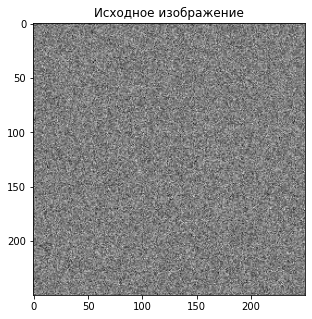

In [10]:
plt.figure(figsize=(10,5))
plt.clf()
plt.title("Исходное изображение")
plt.imshow(image, cmap="binary")
plt.show()

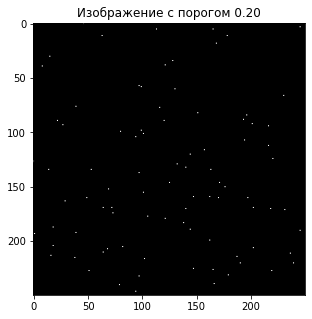

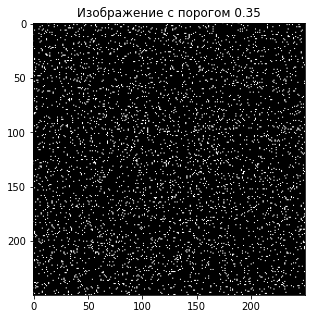

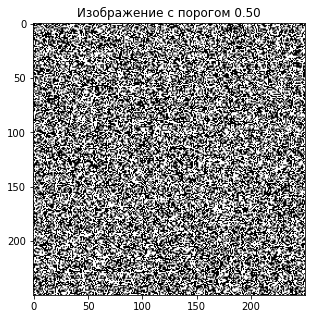

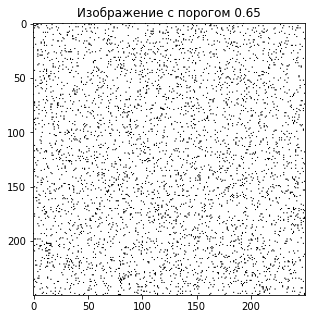

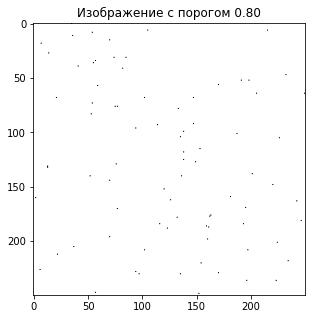

In [11]:
fig = 1
for t in np.linspace(0.2, 0.8, 5):
    timage = image.copy()
    timage[timage >= t] = 1.0
    timage[timage < t] = 0.0
    plt.figure(figsize=(10,5))
    plt.clf()
    plt.title("Изображение с порогом "+"{:.2f}".format(t))
    plt.imshow(timage, cmap="binary")
    fig += 1
plt.show()

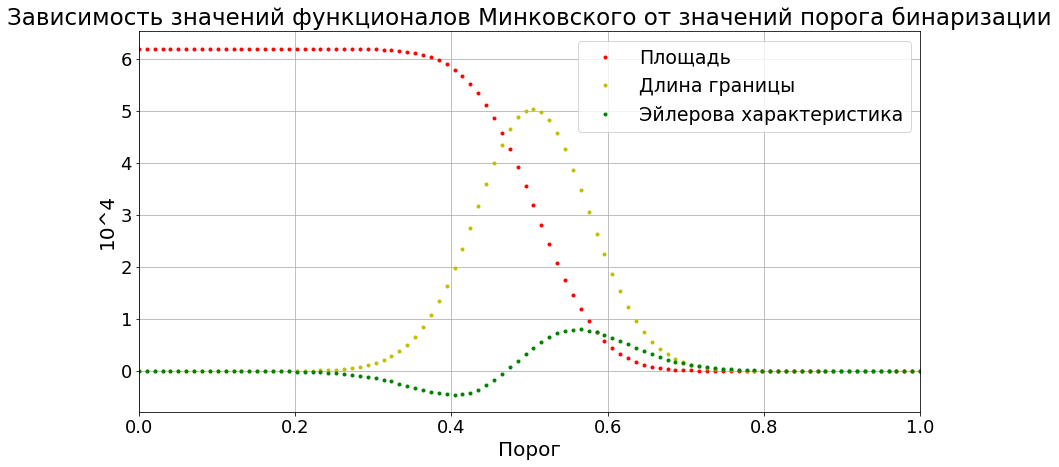

In [12]:
plt.figure(figsize=(14,7))
plt.clf()
plt.grid()
x = np.linspace(0.0, 1.0, 100)
for i in range(len(F)):
    F[i] /= 10000
    U[i] /= 10000
    Chi[i] /= 10000
plt.xlim([0.,1.])
plt.plot(x, F, ".r", x, U, ".y", x, Chi, ".g")
plt.tick_params(axis='both', which='major', labelsize=18)
plt.title("Зависимость значений функционалов Минковского от значений порога бинаризации", fontsize=23)
plt.legend(["Площадь", "Длина границы", "Эйлерова характеристика"], prop={"size":19})
plt.xlabel("Порог", fontsize=20)
plt.ylabel("10^4", fontsize=20)
plt.show()
